# TFLite

In [1]:
!wget https://video.udacity-data.com/topher/2019/September/5d8e8cb3_tflite-apps/tflite-apps.zip

--2020-05-18 20:38:35--  https://video.udacity-data.com/topher/2019/September/5d8e8cb3_tflite-apps/tflite-apps.zip
Resolving video.udacity-data.com (video.udacity-data.com)... 104.31.14.178, 104.31.15.178, 2606:4700:3038::681f:eb2, ...
Connecting to video.udacity-data.com (video.udacity-data.com)|104.31.14.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16833985 (16M) [application/zip]
Saving to: ‘tflite-apps.zip’

tflite-apps.zip     100%[===================>]  16.05M  9.29MB/s    in 1.7s    

2020-05-18 20:38:37 (9.29 MB/s) - ‘tflite-apps.zip’ saved [16833985/16833985]



In [2]:
!unzip tflite-apps.zip

Archive:  tflite-apps.zip
   creating: tflite_apps/
  inflating: tflite_apps/.DS_Store   
   creating: __MACOSX/
   creating: __MACOSX/tflite_apps/
  inflating: __MACOSX/tflite_apps/._.DS_Store  
   creating: tflite_apps/lesson_5_iot_applications/
  inflating: tflite_apps/lesson_5_iot_applications/.DS_Store  
   creating: __MACOSX/tflite_apps/lesson_5_iot_applications/
  inflating: __MACOSX/tflite_apps/lesson_5_iot_applications/._.DS_Store  
   creating: tflite_apps/lesson_5_iot_applications/cats_vs_dogs/
  inflating: tflite_apps/lesson_5_iot_applications/cats_vs_dogs/.DS_Store  
   creating: __MACOSX/tflite_apps/lesson_5_iot_applications/cats_vs_dogs/
  inflating: __MACOSX/tflite_apps/lesson_5_iot_applications/cats_vs_dogs/._.DS_Store  
  inflating: tflite_apps/lesson_5_iot_applications/cats_vs_dogs/requirements.txt  
  inflating: __MACOSX/tflite_apps/lesson_5_iot_applications/cats_vs_dogs/._requirements.txt  
  inflating: tflite_apps/lesson_5_iot_applications/cats_vs_dogs/classify.py

In [4]:
import tensorflow as tf

# store data for x and y
x = [-1,0,1,2,3,4]
y = [-3,-1,1,3,5,7]

# create a simple keras model
model = tf.keras.models.Sequential(
    tf.keras.layers.Dense(units=1, input_shape=[1]))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 5.1674
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 4.2415
Epoch 3/500
1/1 [==============================] - 0s 925us/step - loss: 3.5095
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 2.9301
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 2.4707
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 2.1059
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 1.8156
Epoch 8/500
1/1 [==============================] - 0s 899us/step - loss: 1.5839
Epoch 9/500
1/1 [==============================] - 0s 953us/step - loss: 1.3984
Epoch 10/500
1/1 [==============================] - 0s 962us/step - loss: 1.2494
Epoch 11/500
1/1 [==============================] - 0s 867us/step - loss: 1.1291
Epoch 12/500
1/1 [==============================] - 0s 958us/step - loss: 1.0314
Epoch 13/500
1/1 [==============================]

In [6]:
import pathlib

# export the savedmodel
export_dir = '/content/saved_model'
tf.saved_model.save(model, export_dir)

# convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# save the model
tflite_model_file = pathlib.Path('/content/foo.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /content/saved_model/assets


INFO:tensorflow:Assets written to: /content/saved_model/assets


640

In [7]:
### Alternative - Directly convert keras model into tflite model ###

import tensorflow as tf
import pathlib

# load the MobileNet tf.keras.model
model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224,224,3))

# convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# save the model
tflite_model_file = pathlib.Path('/content/foo2.tflite')
tflite_model_file.write_bytes(tflite_model)

14540800/14536120 [==============================] - 1s 0us/step


13971160

In [ ]:
# quantize only the weights
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model  = converter.convert()

## Official

In [ ]:
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

### Create a basic model of the form y = mx + c

In [12]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200, verbose=1)

# Generate a SavedModel
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 2.4523
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 2.0789
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 1.7821
Epoch 4/200
1/1 [==============================] - 0s 867us/step - loss: 1.5456
Epoch 5/200
1/1 [==============================] - 0s 881us/step - loss: 1.3566
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 1.2050
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 1.0829
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 0.9841
Epoch 9/200
1/1 [==============================] - 0s 954us/step - loss: 0.9036
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 0.8376
Epoch 11/200
1/1 [==============================] - 0s 957us/step - loss: 0.7831
Epoch 12/200
1/1 [==============================] - 0s 938us/step - loss: 0.7377
Epoch 13/200
1/1 [==============================] -

INFO:tensorflow:Assets written to: saved_model/1/assets


### Convert the SavedModel to TFLite

In [13]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

656

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

### Initialize the TFLite interpreter to try it out

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

### Visualize the model

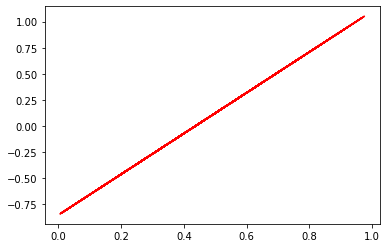

In [16]:
plt.plot(inputs, outputs, 'r')
plt.show()

### Download the TFLite model file

In [ ]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

## Cat vs. Dog with Transfer Learning and TFLite

## Setup 

In [ ]:
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

## Select the Hub/TF2 module to use

Hub modules for TF 1.x won't work here, please use one of the selections provided.

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(
  MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

## Data preprocessing

Use [TensorFlow Datasets](http://tensorflow.org/datasets) to load the cats and dogs dataset.

This `tfds` package is the easiest way to load pre-defined data. If you have your own data, and are interested in importing using it with TensorFlow see [loading image data](../load_data/images.ipynb)


In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

The `tfds.load` method downloads and caches the data, and returns a `tf.data.Dataset` object. These objects provide powerful, efficient methods for manipulating data and piping it into your model.

Since `"cats_vs_dog"` doesn't define standard splits, use the subsplit feature to divide it into (train, validation, test) with 80%, 10%, 10% of the data respectively.

In [ ]:
(train_examples, validation_examples, test_examples), info = tfds.load(
    'cats_vs_dogs',
    split=['train[80%:]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True, 
    as_supervised=True, 
)

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

### Format the Data

Use the `tf.image` module to format the images for the task.

Resize the images to a fixes input size, and rescale the input channels

In [ ]:
def format_image(image, label):
  image = tf.image.resize(image, IMAGE_SIZE) / 255.0
  return  image, label

Now shuffle and batch the data


In [ ]:
BATCH_SIZE = 32 #@param {type:"integer"}

In [ ]:
train_batches = train_examples.shuffle(num_examples // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_examples.map(format_image).batch(1)

Inspect a batch

In [ ]:
for image_batch, label_batch in train_batches.take(1):
  pass

image_batch.shape

## Defining the model

All it takes is to put a linear classifier on top of the `feature_extractor_layer` with the Hub module.

For speed, we start out with a non-trainable `feature_extractor_layer`, but you can also enable fine-tuning for greater accuracy.

In [ ]:
do_fine_tuning = True #@param {type:"boolean"}

Load TFHub Module

In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

In [ ]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(num_classes)
])
model.summary()

In [ ]:
#@title (Optional) Unfreeze some layers
NUM_LAYERS = 7 #@param {type:"slider", min:1, max:50, step:1}
      
if do_fine_tuning:
  feature_extractor.trainable = True
  
  for layer in model.layers[-NUM_LAYERS:]:
    layer.trainable = True

else:
  feature_extractor.trainable = False

## Training the model

In [ ]:
if do_fine_tuning:
  model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
else:
  model.compile(
    optimizer='adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
EPOCHS = 5
hist = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

## Export the model

In [ ]:
CATS_VS_DOGS_SAVED_MODEL = "exp_saved_model"

Export the SavedModel

In [ ]:
tf.saved_model.save(model, CATS_VS_DOGS_SAVED_MODEL)

In [ ]:
%%bash -s $CATS_VS_DOGS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

In [ ]:
loaded = tf.saved_model.load(CATS_VS_DOGS_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

## Convert using TFLite's Converter

Load the TFLiteConverter with the SavedModel

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(CATS_VS_DOGS_SAVED_MODEL)

### Post-training quantization
The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. This technique is enabled as an option in the TensorFlow Lite converter. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

### Post-training integer quantization
We can get further latency improvements, reductions in peak memory usage, and access to integer only hardware accelerators by making sure all model math is quantized. To do this, we need to measure the dynamic range of activations and inputs with a representative data set. You can simply create an input data generator and provide it to our converter.

In [ ]:
def representative_data_gen():
  for input_value, _ in test_batches.take(100):
    yield [input_value]

In [ ]:
converter.representative_dataset = representative_data_gen

The resulting model will be fully quantized but still take float input and output for convenience.

Ops that do not have quantized implementations will automatically be left in floating point. This allows conversion to occur smoothly but may restrict deployment to accelerators that support float. 

### Full integer quantization

To require the converter to only output integer operations, one can specify:

In [ ]:
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

### Finally convert the model

In [ ]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

##Test the TFLite model using the Python Interpreter

In [ ]:
# Load TFLite model and allocate tensors.
  
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
from tqdm import tqdm

# Gather results for the randomly sampled test images
predictions = []

test_labels, test_imgs = [], []
for img, label in tqdm(test_batches.take(10)):
  interpreter.set_tensor(input_index, img)
  interpreter.invoke()
  predictions.append(interpreter.get_tensor(output_index))
  
  test_labels.append(label.numpy()[0])
  test_imgs.append(img)

In [ ]:
#@title Utility functions for plotting
# Utilities for plotting

class_names = ['cat', 'dog']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
    
  img = np.squeeze(img)

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


NOTE: Colab runs on server CPUs. At the time of writing this, TensorFlow Lite doesn't have super optimized server CPU kernels. For this reason post-training full-integer quantized models  may be slower here than the other kinds of optimized models. But for mobile CPUs, considerable speedup can be observed.

In [ ]:
#@title Visualize the outputs { run: "auto" }
index = 0 #@param {type:"slider", min:0, max:9, step:1}
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_imgs)
plt.show()

Download the model.

**NOTE: You might have to run to the cell below twice**

In [ ]:
labels = ['cat', 'dog']

with open('labels.txt', 'w') as f:
  f.write('\n'.join(labels))

try:
  from google.colab import files
  files.download('converted_model.tflite')
  files.download('labels.txt')
except:
  pass

## Prepare the test images for download (Optional)

This part involves downloading additional test images for the Mobile Apps only in case you need to try out more samples

In [ ]:
!mkdir -p test_images

In [ ]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(50)):
  image = tf.cast(image * 255.0, tf.uint8)
  image = tf.squeeze(image).numpy()
  pil_image = Image.fromarray(image)
  pil_image.save('test_images/{}_{}.jpg'.format(class_names[label[0]], index))

In [ ]:
!ls test_images

In [ ]:
!zip -qq cats_vs_dogs_test_images.zip -r test_images/

In [ ]:
try:
  files.download('cats_vs_dogs_test_images.zip')
except:
  pass

## Exercise: Fashion MNIST

In this exercise you will train a simple convolutional neural network on the Fashion MNIST dataset. Once your model is trained, you will convert it to a TF Lite model and then test it using the TF Lite Interpreter.

This notebook uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing we'll use here.

This uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib

print(tf.__version__)

### Download Fashion MNIST Dataset


In [ ]:
splits = tfds.Split.ALL.subsplit(weighted=(80, 10, 10))

splits, info = tfds.load('fashion_mnist', with_info=True, as_supervised=True, split=splits)

(train_examples, validation_examples, test_examples) = splits

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

In [ ]:
class_names = ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
with open('labels.txt', 'w') as f:
  f.write('\n'.join(class_names))

In [ ]:
IMG_SIZE = 28

### Preprocessing data

#### Preprocess

In [ ]:
# Write a function to normalize and resize the images

def format_example(image, label):
  # Cast image to float32
  image = # YOUR CODE HERE
  # Resize the image if necessary
  image = # YOUR CODE HERE
  # Normalize the image in the range [0, 1]
  image = # YOUR CODE HERE
  return image, label

In [ ]:
# Set the batch size to 32

BATCH_SIZE = 32

### Create a Dataset from images and labels

In [ ]:
# Prepare the examples by preprocessing the them and then batching them (and optionally prefetching them)

# If you wish you can shuffle train set here
train_batches = # YOUR CODE HERE

validation_batches = # YOUR CODE HERE
test_batches = # YOUR CODE HERE

## Building the model

In [ ]:
"""
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                247872    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
=================================================================
Total params: 253,322
Trainable params: 253,322
Non-trainable params: 0
"""

In [ ]:
# Build the model shown in the previous cell


model = tf.keras.Sequential([
  # Set the input shape to (28, 28, 1), kernel size=3, filters=16 and use ReLU activation,  
  tf.keras.layers.Conv2D(# YOUR CODE HERE),    
  tf.keras.layers.MaxPooling2D(),
  # Set the number of filters to 32, kernel size to 3 and use ReLU activation 
  tf.keras.layers.Conv2D(# YOUR CODE HERE),
  # Flatten the output layer to 1 dimension
  tf.keras.layers.Flatten(),
  # Add a fully connected layer with 64 hidden units and ReLU activation
  tf.keras.layers.Dense(# YOUR CODE HERE),
  # Attach a final softmax classification head
  tf.keras.layers.Dense(# YOUR CODE HERE)])

# Set the loss and accuracy metrics
model.compile(
    optimizer='adam', 
    loss=# YOUR CODE HERE, 
    metrics=# YOUR CODE HERE)
      

### Train

In [ ]:
model.fit(train_batches, 
          epochs=10,
          validation_data=validation_batches)

## Exporting to TFLite

In [ ]:
export_dir = 'saved_model/1'

# Use the tf.saved_model API to export the SavedModel

# Your Code Here

In [ ]:
#@title Select mode of optimization
mode = "Speed" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT

In [ ]:
optimization

In [ ]:
# Use the TFLiteConverter SavedModel API to initialize the converter
converter = # YOUR CODE HERE

# Set the optimzations
converter.optimizations = # YOUR CODE HERE

# Invoke the converter to finally generate the TFLite model
tflite_model = # YOUR CODE HERE

In [ ]:
tflite_model_file = 'model.tflite'

with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

## Test if your model is working

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
# Gather results for the randomly sampled test images
predictions = []
test_labels = []
test_images = []

for img, label in test_batches.take(50):
  interpreter.set_tensor(input_index, img)
  interpreter.invoke()
  predictions.append(interpreter.get_tensor(output_index))
  test_labels.append(label[0])
  test_images.append(np.array(img))

In [ ]:
#@title Utility functions for plotting
# Utilities for plotting

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  img = np.squeeze(img)

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label.numpy():
    color = 'green'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(list(range(10)), class_names, rotation='vertical')
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array[0])

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

In [ ]:
#@title Visualize the outputs { run: "auto" }
index = 49 #@param {type:"slider", min:1, max:50, step:1}
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.show()
plot_value_array(index, predictions, test_labels)
plt.show()

## Download TFLite model and assets

**NOTE: You might have to run to the cell below twice**

In [ ]:
try:
  from google.colab import files
  files.download(tflite_model_file)
  files.download('labels.txt')
except:
  pass

## Deploying TFLite model

Now once you've the trained TFLite model downloaded, you can ahead and deploy this on an Android/iOS application by placing the model assets in the appropriate location.

## Prepare the test images for download (Optional)

In [ ]:
!mkdir -p test_images

In [ ]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(50)):
  image = tf.cast(image * 255.0, tf.uint8)
  image = tf.squeeze(image).numpy()
  pil_image = Image.fromarray(image)
  pil_image.save('test_images/{}_{}.jpg'.format(class_names[label[0]].lower(), index))

In [ ]:
!ls test_images

In [ ]:
!zip -qq fmnist_test_images.zip -r test_images/

In [ ]:
try:
  files.download('fmnist_test_images.zip')
except:
  pass

In [18]:
!wget https://video.udacity-data.com/topher/2019/September/5d8e8ca8_lesson-3-android-apps/lesson-3-android-apps.zip

--2020-05-18 22:08:32--  https://video.udacity-data.com/topher/2019/September/5d8e8ca8_lesson-3-android-apps/lesson-3-android-apps.zip
Resolving video.udacity-data.com (video.udacity-data.com)... 104.31.15.178, 104.31.14.178, 2606:4700:3038::681f:eb2, ...
Connecting to video.udacity-data.com (video.udacity-data.com)|104.31.15.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15535460 (15M) [application/zip]
Saving to: ‘lesson-3-android-apps.zip’

lesson-3-android-ap 100%[===================>]  14.82M  12.4MB/s    in 1.2s    

2020-05-18 22:08:33 (12.4 MB/s) - ‘lesson-3-android-apps.zip’ saved [15535460/15535460]



In [ ]:
!mv '/content/android-apps.zip' '/content/drive/My Drive/TFLite'
!mv '/content/tflite-apps.zip' '/content/drive/My Drive/TFLite'